In [ ]:
# DS-310 Project

# Data was scraped from a NBA salary data and stat data website. I performed EDA on the data with the final goal of finding the most cost efficient players.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading in data
Salary = pd.read_csv(r'E:\JupyterProjects\NBA Project\csv\salaryscrape.csv')
PlayerStats = pd.read_csv(r'E:\JupyterProjects\NBA Project\csv\player_stats2022.csv')

In [3]:
#Removing unneeded columns
PlayerStats = PlayerStats.drop(['Rk', 'Player-additional'], axis=1)

In [4]:
#Removing the $ from the Salary column and chaging it's type to a float
Salary['Salary'] = Salary['Salary'].str.replace(',', '')#.astype(float)
Salary['Salary'] = Salary['Salary'].str.replace('$','')#.astype(float)
Salary['Salary'] = Salary['Salary'].astype(float)

C:\Users\robin\AppData\Local\Temp\ipykernel_12260\671658703.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Salary['Salary'] = Salary['Salary'].str.replace('$','')#.astype(float)


<Axes: xlabel='Salary', ylabel='Player'>

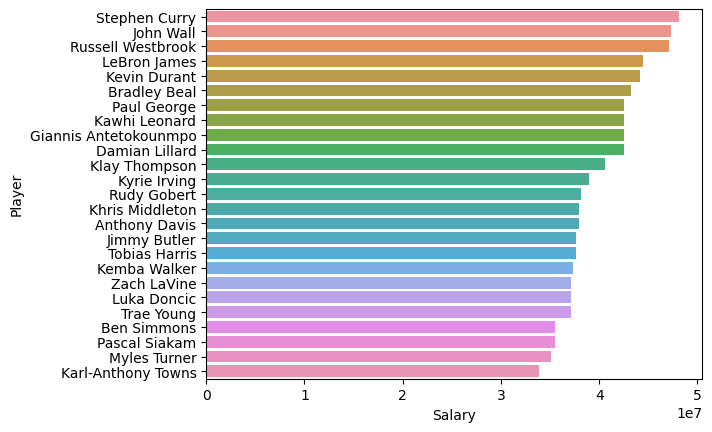

In [5]:
#Bar plot of the top 25 earners in the 2023 NBA Season
top_25 = Salary.sort_values(by='Salary', ascending=False).head(25)
sns.barplot(data=top_25, x='Salary', y='Player')


In [6]:
#Merging PlayerStats and Salary on the Player column with a new name of Players
Players = PlayerStats.merge(Salary, on='Player')

In [7]:
#Removing the salary values under $1,000,000 so that the data is less skewed by abnormal earners
Players = Players[Players['Salary'] >= 1000000]

In [8]:
#Some players are duplicated because they were traded midseason
Players[Players['Player'].str.contains('Kevin Love')]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
337,Kevin Love,PF,34,TOT,62,20,20.0,2.7,6.8,0.389,...,1.0,5.5,6.4,1.9,0.3,0.2,1.1,1.6,8.2,30556968.0
338,Kevin Love,PF,34,CLE,41,3,20.0,2.7,7.0,0.389,...,1.0,5.8,6.8,1.9,0.2,0.2,1.1,1.6,8.5,30556968.0
339,Kevin Love,PF,34,MIA,21,17,20.0,2.6,6.6,0.388,...,0.8,4.9,5.7,1.9,0.4,0.2,1.1,1.5,7.7,30556968.0


In [9]:
#Taking the first value each player so that only ther combined value is returned which is the first.
Players = Players.groupby('Player', as_index=False).agg({
    'Player': 'first',
    'Pos': 'first',
    'Age': 'first',
    'Tm': 'first',
    'G': 'first',
    'GS': 'first',
    'MP': 'first',
    'FG': 'first',
    'FGA': 'first',
    'FG%': 'first',
    '3P': 'first',
    '3PA': 'first',
    '3P%': 'first',
    '2P': 'first',
    '2P%': 'first',
    'eFG%': 'first',
    'FT': 'first',
    'FT%': 'first',
    'ORB': 'first',
    'DRB': 'first',
    'TRB': 'first',
    'AST': 'first',
    'STL': 'first',
    'BLK': 'first',
    'TOV': 'first',
    'PF': 'first',
    'PTS': 'first',
    'Salary': 'first'
})
Players = Players.replace(np.nan, 0)

In [10]:
#Efficiency Rating (EFF): (PTS + REB + AST + STL + BLK − ((FGA − FGM) + (FTA − FTM) + TO))

#EFF Highyly overvalues offense. It's difficult to quantify the defensize efficiency of a player. However, the EFF does utilize the quantifiable parts of defense.

# PTS > Points >> PTS
# REB > Rebounds >> TRB
# AST > Assists >> AST
# STL > Steals >> STL
# BLK > Blocks >> BLK
# FGA > Field golds Attempted >> FGA
# FGM > Field Golds Made >> FG
# FTA > Free Throws Attempted >> FTA
# FTM > Free Throws Made >> FT
# TO > Turnovers >> TOV

In [11]:
#Creating a column addressing purely misses
Players['FT_Miss'] = Players['FT'] / Players['FT%'] - Players['FT']
Players['FG_Miss'] = Players['FG'] / Players['FG%'] - Players['FG']

In [12]:
#A function that calculates Efficiency rating by subtracting positive stats from negative stats
EFF = lambda row: ((row['PTS']) +
                       (row['TRB']) +
                       (row['AST']) +
                       (row['STL']) +
                       (row['BLK']) -
                       ((row['FG_Miss']) +
                       (row['FT_Miss']) +
                       (row['TOV'])))

In [13]:
#Seperate dataframe that purely holds player names and EFF
PlayersEFF = Players.groupby('Player').apply(lambda group: group.apply(EFF, axis=1))

In [14]:

PlayersEFF = PlayersEFF.dropna()

In [15]:
PlayersEFF.sort_values(
    #by = 'EFF',
    ascending = False
).head(10)

Player                      
Joel Embiid              193    36.058396
Giannis Antetokounmpo    127    32.898773
Anthony Davis            16     32.662707
Domantas Sabonis         99     31.104475
Kevin Durant             234    30.934238
Shai Gilgeous-Alexander  342    30.479114
Damian Lillard           71     30.237650
Jayson Tatum             181    29.939044
LeBron James             252    29.810417
Stephen Curry            347    29.188702
dtype: float64

In [16]:
#Creating a column for a players EFF in the main dataframe
Players['EFF'] = Players.apply(lambda row: EFF(row), axis=1)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


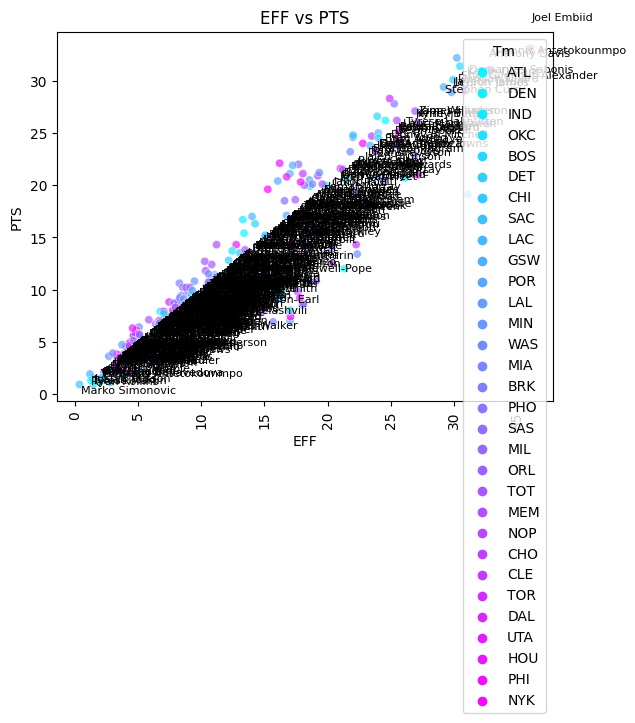

In [17]:
# create scatter plot
colors = sns.color_palette("YlOrRd", n_colors=10)
sns.scatterplot(data=Players, x='EFF', y='PTS', hue = 'Tm', palette='cool', alpha = 0.7)
for i, Player in Players.iterrows():
 plt.text(Player['EFF'] + 0.1, Player['EFF'], Player['Player'], fontsize=8, ha='left', va='center')

# add labels and title
plt.xlabel('EFF')
plt.ylabel('PTS')
plt.title('EFF vs PTS')
plt.xticks(rotation=90)
# display the plot
plt.show()

In [18]:
#Player Efficiency Rating (PER): A complex formula similar to the EFF formula, but utilizes a weight system to differentiate the importance of a players stats.

#PER is known to be the best rating system for performance, but is very complicated. 
#It not only uses basic player stats, but also the pace of their team, stats per minute, and other minute factors.

In [19]:
# Lambda function calcularing the Player Efficiency Rating
PER = lambda row: ((row['FG'] * 85.910) +
                       (row['STL'] * 53.897) +
                       (row['3P'] * 51.757) +
                       (row['FT'] * 46.845) +
                       (row['BLK'] * 39.190) +
                       (row['ORB'] * 39.190) +
                       (row['AST'] * 34.677) +
                       (row['DRB'] * 14.707) -
                       (row['PF'] * 17.174) -
                       (row['FT_Miss'] * 20.091) -
                       (row['FG_Miss']* 39.190) -
                       (row['TOV'] * 53.897)) * (1 / row['MP'])

In [20]:
#Seperate dataframe for just the players and PER rating
PlayersPER = Players.groupby('Player').apply(lambda group: group.apply(PER, axis=1))

In [21]:
PlayersPER = PlayersPER.dropna()

In [22]:
PlayersPER.sort_values(
    #by = 'EFF',
    ascending = False
).head(10)

Player                      
Joel Embiid              193    37.455443
Giannis Antetokounmpo    127    36.213177
Shai Gilgeous-Alexander  342    33.749701
Anthony Davis            16     33.691400
Damian Lillard           71     32.905144
Jimmy Butler             188    32.007111
Stephen Curry            347    31.629549
Kevin Durant             234    31.589710
Zion Williamson          391    30.742775
LeBron James             252    30.404228
dtype: float64

In [23]:
#Not being applied on a per-row basis
#Players['PER'] = Players.apply(lambda row: (row['FG'] * 85.910) + (row['STL'] * 53.897) + (row['3P'] * 51.757) + (row['FT'] * 46.845) + (row['BLK'] * 39.190) + (row['ORB'] * 39.190) + (row['AST'] * 34.677) + (row['DRB'] * 14.707) - (row['PF'] * 17.174) - (row['FT_Miss'] * 20.091) - (row['FG_Miss']* 39.190) - (row['TOV'] * 53.897) * (1 / row['MP']), axis=1)
#Not being applied on a per-row basis so I use the seperately defined PER formula and then attach it to the dataframe
Players['PER'] = Players.apply(lambda row: PER(row), axis=1)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


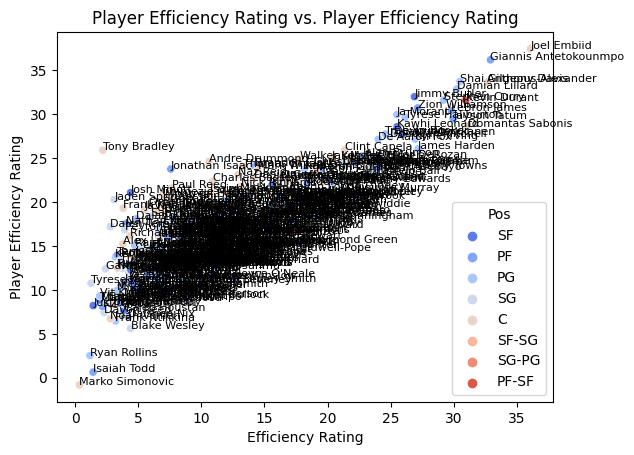

In [24]:
# create scatter plot
ax = sns.scatterplot(data=Players, x='EFF', y='PER', hue='Pos', palette='coolwarm')

# add player names
for i, row in Players.iterrows():
    ax.text(row['EFF'], row['PER'], row['Player'], fontsize=8)

# set plot title and axis labels
ax.set_title('Player Efficiency Rating vs. Player Efficiency Rating')
ax.set_xlabel('Efficiency Rating')
ax.set_ylabel('Player Efficiency Rating')
plt.show()

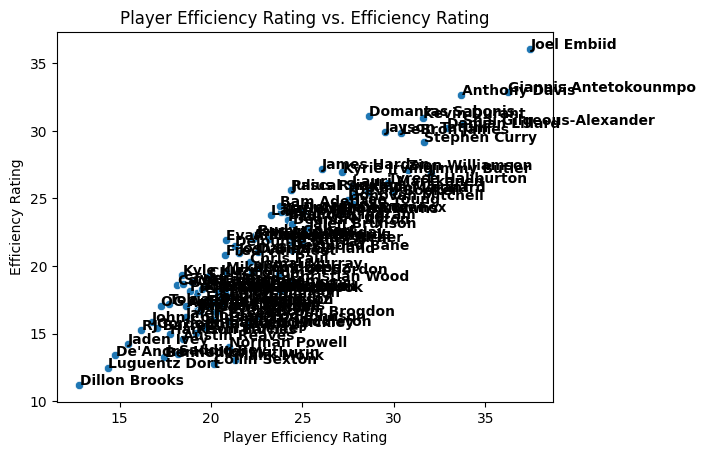

In [25]:
# create scatter plot
top_players = Players.nlargest(100, 'PTS')

sns.scatterplot(x='PER', y='EFF', data=top_players)
for line in range(0,top_players.shape[0]):
     plt.text(top_players.iloc[line]['PER']+0.01, top_players.iloc[line]['EFF'], top_players.iloc[line]["Player"], horizontalalignment='left', size='medium', color='black', weight='semibold')

# set plot title and axis labels
plt.title('Player Efficiency Rating vs. Efficiency Rating')
plt.xlabel('Player Efficiency Rating')
plt.ylabel('Efficiency Rating')
plt.show()

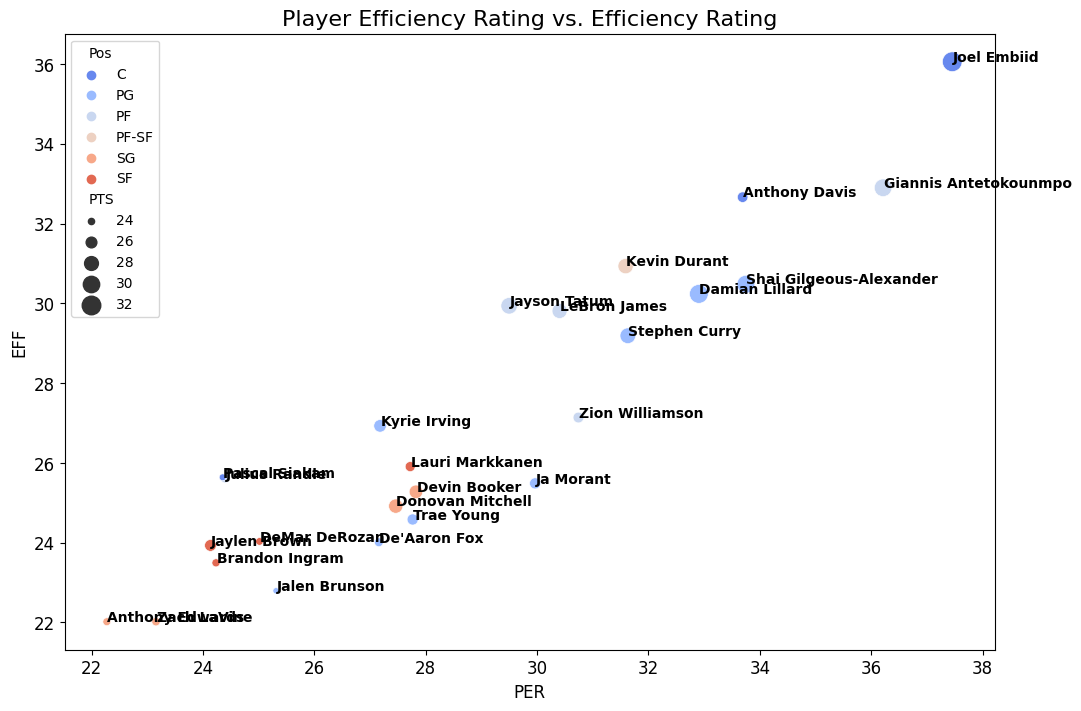

In [26]:
# create scatter plot
top_players = Players.nlargest(25, 'PTS')

sns.scatterplot(x='PER', y='EFF', size='PTS', sizes=(20, 200), data=top_players, hue = 'Pos',palette='coolwarm')

# add player names as text labels
for line in range(0, top_players.shape[0]):
    plt.text(top_players.iloc[line]['PER']+0.01, top_players.iloc[line]['EFF']+0.01, top_players.iloc[line]["Player"], horizontalalignment='left', size='medium', color='black', weight='semibold')

# set plot title and axis labels
plt.title('Player Efficiency Rating vs. Efficiency Rating', fontsize=16)
plt.xlabel('PER', fontsize=12)
plt.ylabel('EFF', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# adjust plot size
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.show()

<Axes: >

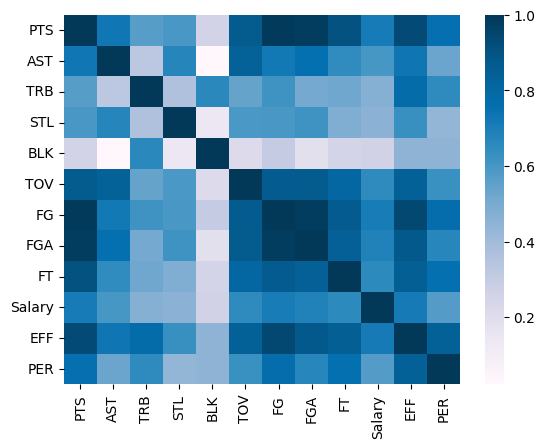

In [27]:
heatmap_cols = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FG', 'FGA', 'FT', 'Salary' ,'EFF', 'PER']
heatmap_data = Players[heatmap_cols]

sns.heatmap(heatmap_data.corr(), cmap='PuBu', annot=False)

In [28]:
#Salary has very low correlation with blocking
#Salary has the highest correlation with points and field goals

In [29]:
CostEFF = ["Player", 'Pos', 'Age', 'PTS', 'FG', 'EFF', 'PER', 'Salary']
CostEFF = Players[CostEFF]
CostEFF['EFFRatio'] = CostEFF['EFF'] / CostEFF['Salary']
CostEFF['PERRatio'] = CostEFF['PER'] / CostEFF['Salary']
CostEFF

C:\Users\robin\AppData\Local\Temp\ipykernel_12260\571728670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CostEFF['EFFRatio'] = CostEFF['EFF'] / CostEFF['Salary']
C:\Users\robin\AppData\Local\Temp\ipykernel_12260\571728670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CostEFF['PERRatio'] = CostEFF['PER'] / CostEFF['Salary']


,Player,Pos,Age,PTS,FG,EFF,PER,Salary,EFFRatio,PERRatio
0,AJ Griffin,SF,19,8.9,3.4,8.217031,15.536378,3536160.0,2.323716e-06,4.393573e-06
1,Aaron Gordon,PF,27,16.3,6.3,19.424524,23.729007,19690909.0,9.864717e-07,1.205074e-06
2,Aaron Holiday,PG,26,3.9,1.5,4.537550,11.703286,1968175.0,2.305460e-06,5.946263e-06
3,Aaron Nesmith,SF,23,10.1,3.5,10.493971,13.699220,3804360.0,2.758406e-06,3.600926e-06
4,Aaron Wiggins,SG,24,6.8,2.7,8.163867,15.020004,1563518.0,5.221473e-06,9.606544e-06
...,...,...,...,...,...,...,...,...,...,...
387,Zach Collins,C,25,11.6,4.5,15.578839,20.795358,7350000.0,2.119570e-06,2.829300e-06
388,Zach LaVine,SG,27,24.8,8.7,22.019403,23.156579,37096500.0,5.935709e-07,6.242255e-07
389,Zeke Nnaji,PF,22,5.2,2.1,6.116374,14.842781,2617800.0,2.336456e-06,5.669944e-06
390,Ziaire Williams,SF,21,5.7,2.3,5.091864,10.146807,4591680.0,1.108933e-06,2.209825e-06


In [30]:
CostEFF = CostEFF.sort_values(
    by='EFFRatio',
    ascending=False
)
CostEFF.head(10)

,Player,Pos,Age,PTS,FG,EFF,PER,Salary,EFFRatio,PERRatio
243,Kris Dunn,PG,28,13.2,5.3,18.175573,23.785410,1000001.0,0.000018,0.000024
94,Desmond Bane,SG,24,21.5,7.8,21.205316,24.425058,2130240.0,0.000010,0.000011
367,Tre Jones,PG,23,12.9,5.0,16.648614,20.403880,1782621.0,0.000009,0.000011
19,Austin Reaves,SG,24,13.0,4.0,14.571897,18.456146,1563518.0,0.000009,0.000012
201,Jordan Goodwin,PG,24,6.6,2.5,9.647768,17.748256,1280206.0,0.000008,0.000014
292,Nick Richards,C,25,8.2,3.0,13.126786,21.819538,1782621.0,0.000007,0.000012
73,Daniel Gafford,C,24,9.0,3.7,14.188949,22.740447,1930681.0,0.000007,0.000012
151,Jaden Hardy,SG,20,8.8,3.0,7.449591,17.761133,1017781.0,0.000007,0.000017
337,Sandro Mamukelashvili,C,23,6.1,2.3,8.033974,16.949829,1116112.0,0.000007,0.000015
362,Thomas Bryant,C,25,9.8,3.9,13.271946,24.065340,1968175.0,0.000007,0.000012


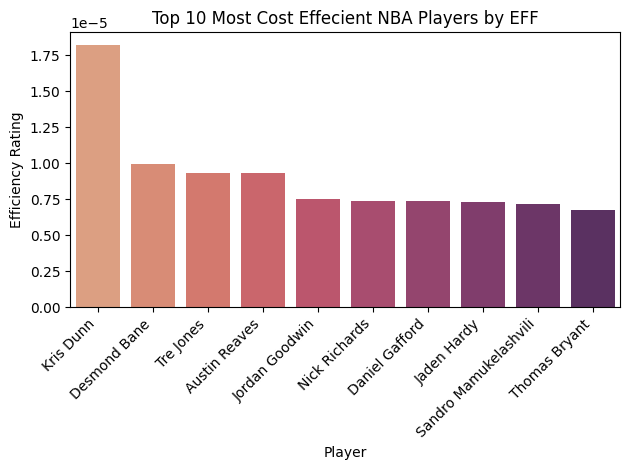

In [31]:
top_cost_eff_playersEFF = CostEFF.sort_values(by ='EFFRatio', ascending=False).head(10)

sns.barplot(x='Player', y='EFFRatio', data = top_cost_eff_playersEFF, palette = 'flare')

plt.title("Top 10 Most Cost Effecient NBA Players by EFF")
plt.xlabel("Player")
plt.ylabel("Efficiency Rating")

plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.show()

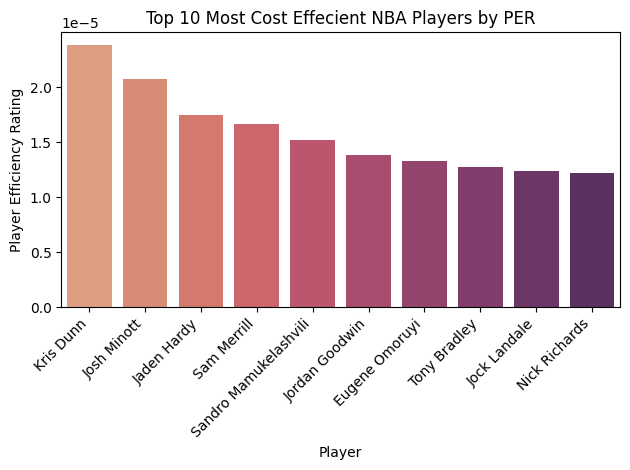

In [32]:
top_cost_eff_playersPER = CostEFF.sort_values(by ='PERRatio', ascending=False).head(10)

sns.barplot(x='Player', y='PERRatio', data = top_cost_eff_playersPER, palette = 'flare')

plt.title("Top 10 Most Cost Effecient NBA Players by PER")
plt.xlabel("Player")
plt.ylabel("Player Efficiency Rating")
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
#Players['FG%'].mean()
#pg_players = Players[Players['Pos'] == 'PG']
#pg_players['FG%'].mean()
#ar = Players[Players['Player'] == 'Austin Reaves']
#ar['FG%']
#Players[Players['Player'] == 'Austin Reaves']